In [2]:
# 线性回归拟合二维数据，二维数据的基本关系约为 y = 2x 
# 主要由四个步骤：准备数据——>搭建模型——>迭代训练——>使用模型

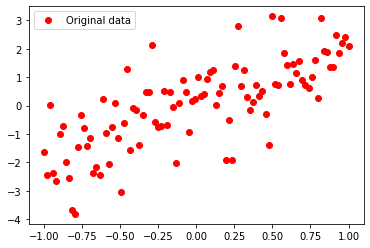

In [12]:
# 生成含噪声的数据
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape)   # 加入噪声

# 显示模拟数据
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

In [13]:
# 搭建模型：正向
# 模型参数：随机初始化权重和偏置
W = tf.Variable(np.random.randn(), name="weight")   
b = tf.Variable(np.random.randn(), name="bias")

# 线性回归函数
def linear_regression(x):
    return W*x + b


# 搭建模型：反向
# 损失函数
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred-y_true))

# 优化器采用随机梯度下降(SGD)
learning_rate = 0.01  # 学习率
optimizer = tf.optimizers.SGD(learning_rate)

In [16]:
# 计算梯度，更新参数
def run_optimization():   
    # tf.GradientTape()梯度带，可以查看每一次epoch的参数值
    with tf.GradientTape() as tape:
        pred = linear_regression(train_X)
        loss = mean_square(pred, train_Y)
    # 计算梯度
    gradients = tape.gradient(loss, [W, b])
    # 更新W，b
    optimizer.apply_gradients(zip(gradients, [W, b]))

    
# 开始训练
training_steps = 100  # 训练次数
display_step = 2  # 训练2次输出一次

for step in range(1, training_steps+1):
    run_optimization()
    if step % display_step == 0:
        pred = linear_regression(train_X)
        loss = mean_square(pred, train_Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 2, loss: 1.458735, W: 0.820374, b: -0.050622
step: 4, loss: 1.446217, W: 0.835720, b: -0.046645
step: 6, loss: 1.434075, W: 0.850858, b: -0.042824
step: 8, loss: 1.422298, W: 0.865790, b: -0.039156
step: 10, loss: 1.410871, W: 0.880521, b: -0.035632
step: 12, loss: 1.399783, W: 0.895051, b: -0.032248
step: 14, loss: 1.389022, W: 0.909385, b: -0.028998
step: 16, loss: 1.378578, W: 0.923524, b: -0.025877
step: 18, loss: 1.368440, W: 0.937471, b: -0.022879
step: 20, loss: 1.358597, W: 0.951230, b: -0.020000
step: 22, loss: 1.349040, W: 0.964802, b: -0.017235
step: 24, loss: 1.339759, W: 0.978190, b: -0.014580
step: 26, loss: 1.330746, W: 0.991396, b: -0.012029
step: 28, loss: 1.321992, W: 1.004423, b: -0.009580
step: 30, loss: 1.313489, W: 1.017274, b: -0.007228
step: 32, loss: 1.305229, W: 1.029951, b: -0.004968
step: 34, loss: 1.297204, W: 1.042456, b: -0.002799
step: 36, loss: 1.289407, W: 1.054791, b: -0.000715
step: 38, loss: 1.281831, W: 1.066959, b: 0.001286
step: 40, loss: 1

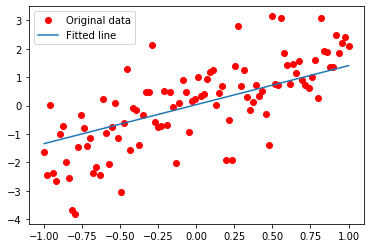

In [17]:
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W*train_X + b), label='Fitted line')
plt.legend()
plt.show()